In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test)=cifar10.load_data()

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

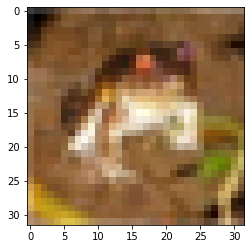

In [4]:
plt.imshow(X_train[0])

In [5]:
y_test[0]

array([3])

TEST IMAGES LABELS ARE: [3, 8, 8, 0, 6]
Corresponding Labels are: ['cat', 'ship', 'ship', 'airplane', 'frog']


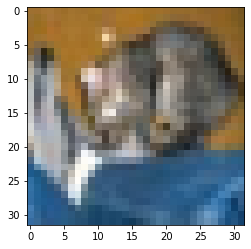

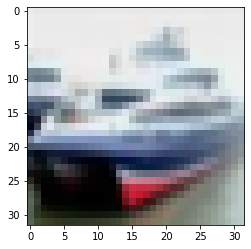

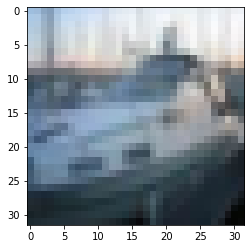

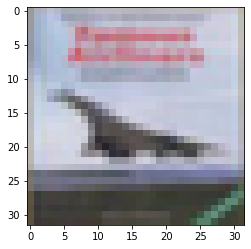

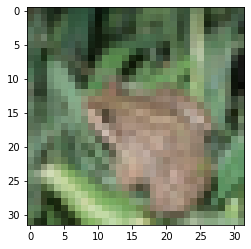

In [6]:
cifar_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

print("TEST IMAGES LABELS ARE: {}".format(
    str(
        [x[0] for x in y_train[0:5]]
    )
))
print("Corresponding Labels are: {}".format(
    str(
        [cifar_labels[x[0]] for x in y_train[0:5]]
    )
))

for i in range(5):
    img=X_test[i]
    plt.imshow(img)
    plt.show()

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
# X_train=np.reshape(X_train, (len(X_train), (32*32*3)))
# X_test=np.reshape(X_test, (len(X_test), (32*32*3)))
X_train=X_train.astype('float32')/255.
X_test=X_test.astype('float32')/255.

X_train.shape

(50000, 32, 32, 3)

In [9]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, MaxPool2D, Conv2D, BatchNormalization

In [10]:
import keras

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
y_train, y_test=to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

In [13]:
y_train.shape

(50000, 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
model=Sequential([
    
    Conv2D(filters=32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=(32, 32, 3)),
    Conv2D(filters=64,
          kernel_size=(3, 3),
          activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(units=512, activation='relu'),
    Dense(units=1024, activation='relu'),
    Dropout(0.25),
    
    Dense(units=10, activation='softmax')
])
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(0.001), 
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6423040   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)             

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 172s 4ms/step - loss: 1.4418 - accuracy: 0.4748 - val_loss: 1.1647 - val_accuracy: 0.5779
Epoch 2/10
40000/40000 [==============================] - 168s 4ms/step - loss: 1.0022 - accuracy: 0.6440 - val_loss: 1.0202 - val_accuracy: 0.6463
Epoch 3/10
40000/40000 [==============================] - 169s 4ms/step - loss: 0.7761 - accuracy: 0.7272 - val_loss: 0.8954 - val_accuracy: 0.6898
Epoch 4/10
40000/40000 [==============================] - 171s 4ms/step - loss: 0.5848 - accuracy: 0.7940 - val_loss: 0.9095 - val_accuracy: 0.6972
Epoch 5/10
40000/40000 [==============================] - 169s 4ms/step - loss: 0.3982 - accuracy: 0.8601 - val_loss: 0.9420 - val_accuracy: 0.7104
Epoch 6/10
40000/40000 [==============================] - 171s 4ms/step - loss: 0.2612 - accuracy: 0.9089 - val_loss: 1.1109 - val_accuracy: 0.6969
Epoch 7/10
40000/40000 [==============================] - 169s

In [18]:
score=model.evaluate(X_test, y_test, verbose=2, batch_size=32)
score

[1.5028840067863465, 0.6937000155448914]

In [19]:
y_pred=model.predict(X_test)
y_pred[0]

array([1.3585960e-09, 1.1229263e-09, 3.4028362e-09, 9.8924994e-01,
       9.1063712e-10, 1.0749819e-02, 6.2076633e-09, 4.6078174e-08,
       2.7106501e-07, 1.4473188e-09], dtype=float32)

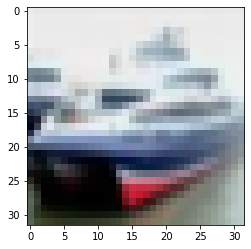

In [20]:
plt.imshow(X_test[1])

In [21]:
y_pred[1].argmax()

8

In [22]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [23]:
y_test.shape

(10000, 10)

In [24]:
y_pred[1].argmax()

8

PREDICTED VALUE is cat


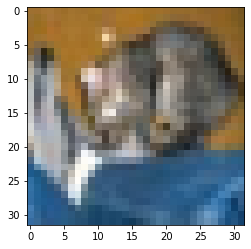

PREDICTED VALUE is ship


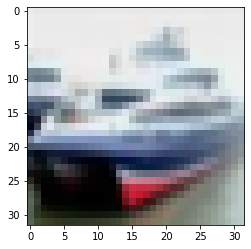

PREDICTED VALUE is ship


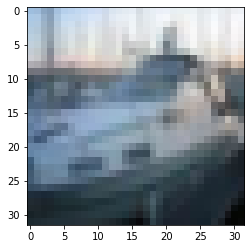

PREDICTED VALUE is airplane


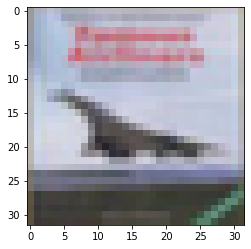

PREDICTED VALUE is frog


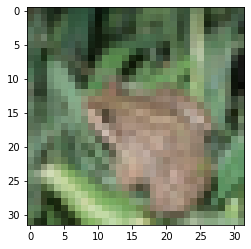

In [25]:
for i in range(5):
    print("PREDICTED VALUE is {}".format(
        str(
            [cifar_labels[y_pred[i].argmax()]][0]
        )
    ))
    plt.imshow(X_test[i])
    plt.show()